# Hardware in comparison

This notebook deals with mains frequency measurements with optocoupler and schmitt trigger hardware to verify that both hardware solutions have the same results. Therefore, both hardware solutions measure at the same time for 1h the mains frequency under the same conditions. The results are shown below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## Optocoupler

In [3]:
data_optocoupler = np.genfromtxt('optocoupler_frequency_data.txt')

In [4]:
frequency_data_optocoupler = data_optocoupler[:, 0]

In [5]:
t_optocoupler = np.arange(len(frequency_data_optocoupler[:3600]))

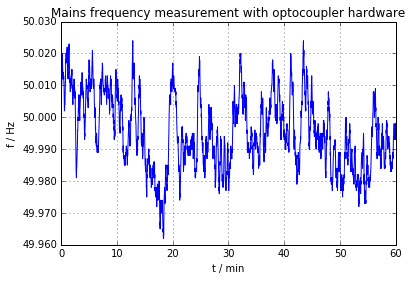

In [6]:
fig1, ax1 = plt.subplots()
plt.title('Mains frequency measurement with optocoupler hardware')
plt.xlabel('t / min')
plt.ylabel('f / Hz')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(t_optocoupler / 60, frequency_data_optocoupler[:3600])
plt.grid()
plt.show()

## Schmitt Trigger

In [7]:
data_schmitt = np.genfromtxt('schmitt_frequency_data.txt')

In [8]:
frequency_data_schmitt = data_schmitt[:, 0]

In [9]:
t_schmitt = np.arange(len(frequency_data_schmitt[:3600]))

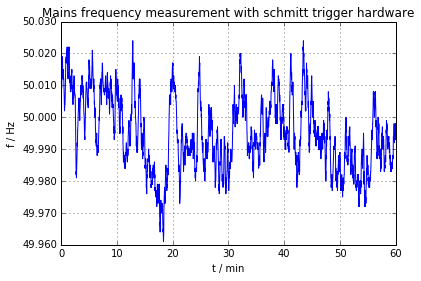

In [10]:
fig2, ax2 = plt.subplots()
plt.title('Mains frequency measurement with schmitt trigger hardware')
plt.xlabel('t / min')
plt.ylabel('f / Hz')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(t_schmitt / 60, frequency_data_schmitt[:3600])
plt.grid()
plt.show()

## Optocoupler vs. Schmitt Trigger

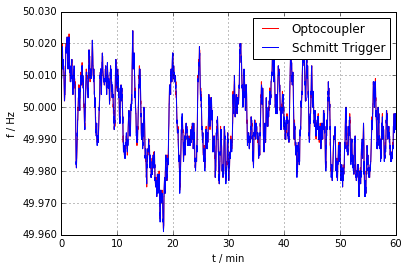

In [11]:
fig3, ax3 = plt.subplots()
plt.xlabel('t / min')
plt.ylabel('f / Hz')
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(t_optocoupler / 60, frequency_data_optocoupler[:3600], label='Optocoupler', color='r')
plt.plot(t_schmitt / 60, frequency_data_schmitt[:3600], label='Schmitt Trigger')
plt.legend()
plt.grid()
plt.show()

## The difference

In [12]:
difference = frequency_data_optocoupler[:3600] - frequency_data_schmitt[:3600]

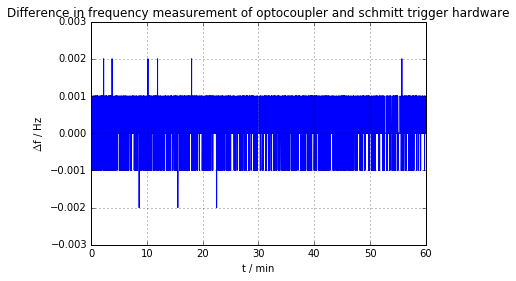

In [13]:
plt.plot(t_schmitt / 60, difference)
plt.title('Difference in frequency measurement of optocoupler and schmitt trigger hardware')
plt.xlabel('t / min')
plt.ylabel('$\Delta$f / Hz')
plt.grid()
plt.show()

All in all, the deviation between optocoupler and schmitt trigger hardware is very small. The maximum deviation is just +/- 2 mHz. A possible reason could be that the oscillation behaviour of the quartzes is not the same. Therefore, the assumption can be made that the pulse shaping methods (optocoupler and schmitt trigger) lead to the same precision in frequency measurements.

In [15]:
np.corrcoef(frequency_data_optocoupler[:3600], frequency_data_schmitt[:3600])

array([[ 1.        ,  0.99880274],
       [ 0.99880274,  1.        ]])